# 라이브러리 설치

In [1]:
pip install pyvisa

   ---------------------------------------- 0.0/176.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/176.7 kB ? eta -:--:--
   ---------------------------------------  174.1/176.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 176.7/176.7 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install pyvisa-py

   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.6 kB ? eta -:--:--
   ---------------------------------------- 75.6/75.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install zeroconf

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install gpib-ctypes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 기본 구조

In [1]:
import pyvisa
rm = pyvisa.ResourceManager()
print(rm.list_resources())

('USB::0x05E6::0x2461::04628945::INSTR',)


In [13]:
instrument = rm.open_resource('USB::0x05E6::0x2461::04628945::INSTR')
# instrument = rm.open_resource('ASRL3::INSTR')

In [14]:
try:
    # Query the instrument ID
    idn_response = instrument
    print("Connected to:", idn_response)

except pyvisa.VisaIOError as e:
    print(f"An error occurred: {e}")

Connected to: USBInstrument at USB0::0x05E6::0x2461::04628945::0::INSTR


Voltage: 0.0, Current: -1.146045e-11
Voltage: 0.1, Current: 2.984326e-12
Voltage: 0.2, Current: 1.138948e-11
Voltage: 0.30000000000000004, Current: 8.467022e-11
Voltage: 0.4, Current: 3.690228e-09
Voltage: 0.5, Current: 1.725951e-07
Voltage: 0.6000000000000001, Current: 8.047573e-06
Voltage: 0.7000000000000001, Current: 0.0003699838
Voltage: 0.8, Current: 0.01446265
Voltage: 0.9, Current: 0.02000052
Voltage: 1.0, Current: 0.02000061
Voltage: 1.1, Current: 0.02000056
Voltage: 1.2000000000000002, Current: 0.02000049
Voltage: 1.3, Current: 0.02000061
Voltage: 1.4000000000000001, Current: 0.02000071
Voltage: 1.5, Current: 0.02000061
Voltage: 1.6, Current: 0.02000065
Voltage: 1.7000000000000002, Current: 0.02000066
Voltage: 1.8, Current: 0.02000056
Voltage: 1.9000000000000001, Current: 0.02000069
Voltage: 2.0, Current: 0.02000066
Voltage: 2.1, Current: 0.02000055
Voltage: 2.2, Current: 0.0199998
Voltage: 2.3000000000000003, Current: 0.01999973
Voltage: 2.4000000000000004, Current: 0.0199997

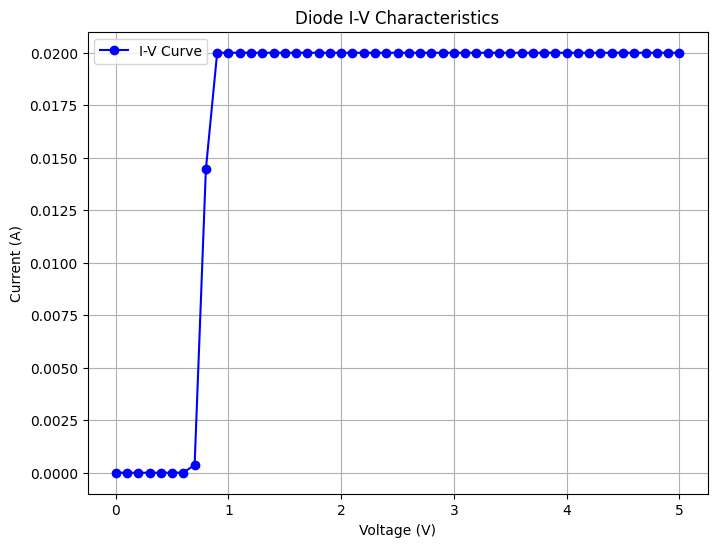

In [2]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt

# 1. PyVISA ResourceManager 생성 및 장치 연결
rm = pyvisa.ResourceManager()
# instrument = rm.open_resource('USB0::0x05E6::0x2461::04628945::INSTR')
instrument = rm.open_resource('GPIB0::20::INSTR')

# 2. 타임아웃 및 종료 문자 설정
instrument.timeout = 10000  # 타임아웃을 10초로 설정
instrument.write_termination = '\n'
instrument.read_termination = '\n'

# 3. 장치 초기화 및 오류 클리어
instrument.write("*RST")  # 장비 리셋
instrument.write("*CLS")  # 상태 클리어

instrument.write(":FORMat:ELEMents CURR")

# 4. 다이오드 테스트 설정
try:
    # 소스 및 측정 모드 설정
    instrument.write(":SOURce:FUNCtion VOLTage")          # 전압 소스 모드 설정
    instrument.write(":SENSe:FUNCtion 'CURRent'")         # 전류 측정 모드 활성화
    instrument.write(":SOURce:VOLTage:RANGe:AUTO ON")     # 자동 전압 범위 활성화
    instrument.write(":SENSe:CURRent:RANGe:AUTO ON")      # 자동 전류 범위 활성화

    # 보호 설정 (과전류 제한)
    # instrument.write(":SOURce:VOLTage:ILIMit 0.02")
    instrument.write(f"SENS:CURR:PROT 0.02")

    # 출력 활성화
    instrument.write(":OUTPut ON")

    # 데이터 수집 준비
    voltages = np.arange(0, 5.1, 0.1)  # 테스트할 전압 범위 (0V ~ 5V, 스텝 0.1V)
    currents = []

    for voltage in voltages:
        try:
            # 전압 설정 및 명령 완료 대기
            instrument.write(f":SOURce:VOLTage {voltage}")
            instrument.query("*OPC?")  # 명령 완료 대기

            # 현재 전류 측정값 읽기
            current = float(instrument.query(":MEASure:CURRent?").strip())
            currents.append(current)
            print(f"Voltage: {voltage}, Current: {current}")  # 디버깅 출력

        except Exception as e:
            print(f"Error reading current at voltage {voltage}: {e}")
            currents.append(0)  # 오류 시 0을 추가

except Exception as e:
    print(f"Setup error: {e}")

finally:
    # 출력 비활성화 및 장비 닫기
    instrument.write(":OUTPut OFF")
    instrument.close()

# 데이터 출력 확인 (옵션)
print("Voltage (V):", voltages)
print("Current (A):", currents)

# 그래프 그리기
if len(currents) == len(voltages):
    plt.figure(figsize=(8, 6))
    plt.plot(voltages, currents, marker='o', linestyle='-', color='b', label="I-V Curve")
    plt.title("Diode I-V Characteristics")
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Error: Voltage and Current data lengths do not match.")


Voltage: 0.0, Current: 1.485919e-10
Voltage: 0.1, Current: 4.282641e-11
Voltage: 0.2, Current: -4.129617e-11
Voltage: 0.30000000000000004, Current: 1.225496e-10
Voltage: 0.4, Current: 2.381288e-09
Voltage: 0.5, Current: 1.114372e-07
Voltage: 0.6000000000000001, Current: 5.485579e-06
Voltage: 0.7000000000000001, Current: 0.0001049993
Voltage: 0.8, Current: 0.0001049991
Voltage: 0.9, Current: 0.0001049992
Voltage: 1.0, Current: 0.0001049988
Voltage: 1.1, Current: 0.0001049993
Voltage: 1.2000000000000002, Current: 0.000104999
Voltage: 1.3, Current: 0.0001049989
Voltage: 1.4000000000000001, Current: 0.000104999
Voltage: 1.5, Current: 0.0001049989
Voltage: 1.6, Current: 0.0001049986
Voltage: 1.7000000000000002, Current: 0.0001049988
Voltage: 1.8, Current: 0.0001049988
Voltage: 1.9000000000000001, Current: 0.0001049988
Voltage: 2.0, Current: 0.0001049988
Voltage: 2.1, Current: 0.000104999
Voltage: 2.2, Current: 0.0001049992
Voltage: 2.3000000000000003, Current: 0.0001049994
Voltage: 2.400000

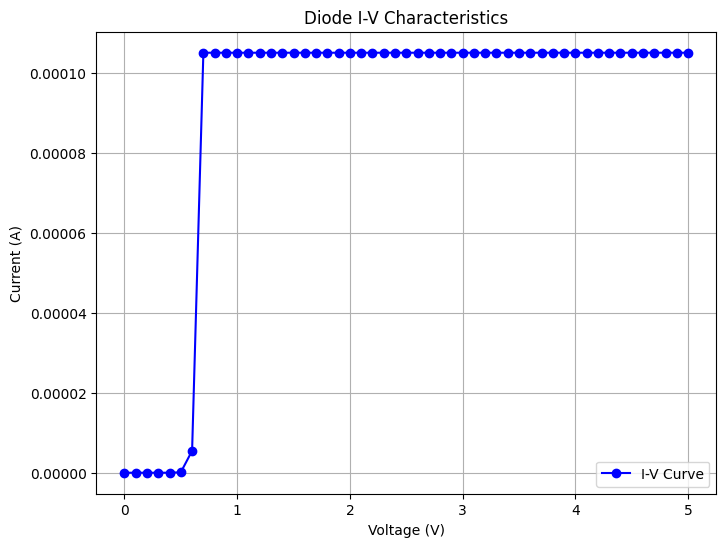

In [64]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt

# 1. PyVISA ResourceManager 생성 및 장치 연결
rm = pyvisa.ResourceManager()

# 실제 GPIB 주소 확인 필요
instrument = rm.open_resource('GPIB0::24::INSTR')  

# 2. 타임아웃 및 종료 문자 설정
instrument.timeout = 20000  # 타임아웃을 20초로 설정
instrument.write_termination = '\r\n'  # Keithley 장비는 '\r\n' 사용
instrument.read_termination = '\r\n'

# 3. 장치 초기화 및 오류 클리어
instrument.write("*RST")  # 장비 리셋
instrument.write("*CLS")  # 상태 클리어

# 데이터 포맷 설정 (전류만 반환)
instrument.write(":FORMat:ELEMents CURRent")

# 4. 다이오드 테스트 설정
try:
    # 소스 및 측정 모드 설정
    instrument.write(":SOURce:FUNCtion VOLTage")          # 전압 소스 모드 설정
    instrument.write(":SENSe:FUNCtion:ON \"CURRent\"")    # 전류 측정 모드 활성화
    instrument.write(":SOURce:VOLTage:RANGe:AUTO ON")     # 자동 전압 범위 활성화
    instrument.write(":SENSe:CURRent:RANGe:AUTO ON")      # 자동 전류 범위 활성화

    # 보호 설정 (과전류 제한)
    instrument.write(":SOURce:CURRent:LIMit 0.02")        # 최대 전류 제한 (20mA)

    # 출력 활성화
    instrument.write(":OUTPut ON")

    # 데이터 수집 준비
    voltages = np.arange(0, 5.1, 0.1)  # 테스트할 전압 범위 (0V ~ 5V, 스텝 0.1V)
    currents = []

    for voltage in voltages:
        try:
            # 전압 설정 및 명령 완료 대기
            instrument.write(f":SOURce:VOLTage {voltage}")
            instrument.query("*OPC?")  # 명령 완료 대기

            # 현재 전류 측정값 읽기
            current = float(instrument.query(":MEASure:CURRent?").strip())
            currents.append(current)
            print(f"Voltage: {voltage}, Current: {current}")  # 디버깅 출력

        except Exception as e:
            print(f"Error reading current at voltage {voltage}: {e}")
            currents.append(0)  # 오류 시 0을 추가

except Exception as e:
    print(f"Setup error: {e}")

finally:
    # 출력 비활성화 및 장비 닫기
    instrument.write(":OUTPut OFF")
    instrument.close()

# 데이터 출력 확인 (옵션)
print("Voltage (V):", voltages)
print("Current (A):", currents)

# 그래프 그리기
if len(currents) == len(voltages):
    plt.figure(figsize=(8, 6))
    plt.plot(voltages, currents, marker='o', linestyle='-', color='b', label="I-V Curve")
    plt.title("Diode I-V Characteristics")
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Error: Voltage and Current data lengths do not match.")


Voltage: 0.0 V, Current: 8.104171e-11 A
Voltage: 0.1 V, Current: 5.77933e-11 A
Voltage: 0.2 V, Current: 5.834209e-11 A
Voltage: 0.30000000000000004 V, Current: 1.203049e-10 A
Voltage: 0.4 V, Current: 2.331753e-09 A
Voltage: 0.5 V, Current: 1.123281e-07 A
Voltage: 0.6000000000000001 V, Current: 5.528185e-06 A
Voltage: 0.7000000000000001 V, Current: 0.0001049992 A
Voltage: 0.8 V, Current: 0.0001049995 A
Voltage: 0.9 V, Current: 0.0001049993 A
Voltage: 1.0 V, Current: 0.0001049991 A
Voltage: 1.1 V, Current: 0.0001049989 A
Voltage: 1.2000000000000002 V, Current: 0.000104999 A
Voltage: 1.3 V, Current: 0.000104999 A
Voltage: 1.4000000000000001 V, Current: 0.0001049989 A
Voltage: 1.5 V, Current: 0.0001049989 A
Voltage: 1.6 V, Current: 0.0001049988 A
Voltage: 1.7000000000000002 V, Current: 0.0001049988 A
Voltage: 1.8 V, Current: 0.0001049986 A
Voltage: 1.9000000000000001 V, Current: 0.0001049986 A
Voltage: 2.0 V, Current: 0.0001049988 A
Voltage: 2.1 V, Current: 0.0001049986 A
Voltage: 2.2 V, C

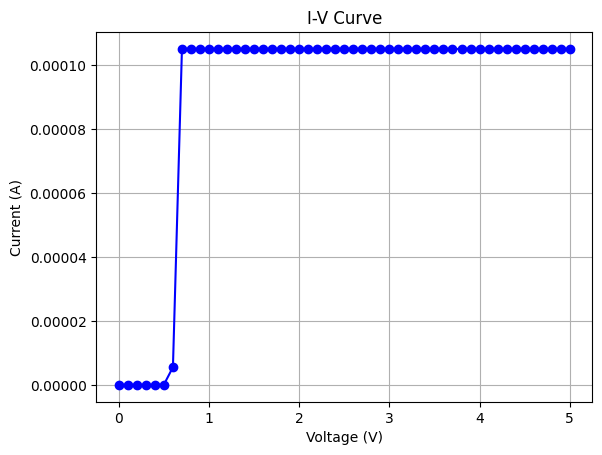

In [49]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import logging

# 모든 로거 핸들러 제거
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# 로깅 수준 설정
logging.basicConfig(level=logging.WARNING)



def configure_instrument(instrument):
    # 장치 식별
    idn = instrument.query("*IDN?").strip()
    is_2410 = "2410" in idn
    is_2461 = "2461" in idn

    if not (is_2410 or is_2461):
        raise ValueError("Unsupported Keithley model")

    # 공통 설정
    instrument.write("*RST")
    instrument.write("*CLS")
    instrument.write(":SOUR:FUNC VOLT")
    instrument.write(":SENS:FUNC 'CURR'")
    # 2410 전용 포맷 설정
    if is_2410:
        instrument.write(":FORM:ELEM CURR")  # 2410에서만 필요

    instrument.write(":SOUR:VOLT:RANG:AUTO ON")
    instrument.write(":SENS:CURR:RANG:AUTO ONCE" if is_2410 else ":SENS:CURR:RANG:AUTO ON")
    instrument.write(":SOUR:VOLT:ILIM 0.02")

    return is_2410  # 측정 데이터 처리 방식 분기를 위해 반환

# 장치 연결
rm = pyvisa.ResourceManager()
# instrument = rm.open_resource('USB0::0x05E6::0x2461::04628945::INSTR')
instrument = rm.open_resource('GPIB0::24::INSTR')

# 통신 설정
instrument.timeout = 10000
instrument.write_termination = '\n'
instrument.read_termination = '\n'

try:
    is_2410 = configure_instrument(instrument)
    instrument.write(":OUTP ON")

    # 데이터 수집
    voltages = np.arange(0, 5.1, 0.1)
    currents = []

    for v in voltages:
        instrument.write(f":SOUR:VOLT {v}")
        instrument.query("*OPC?")
        
        # 측정값 읽기 (장치별 처리)
        if is_2410:
            raw = instrument.query(":MEAS:CURR?")
            current = float(raw.strip())
        else:  # 2461: 기본적으로 전류값만 반환
            raw = instrument.query(":MEAS:CURR?")
            current = float(raw.split(',')[0])  # 다중 필드시 첫 번째 값 추출
        
        currents.append(current)
        print(f"Voltage: {v} V, Current: {current} A")

except Exception as e:
    print(f"Error: {str(e)}")

finally:
    instrument.write(":OUTP OFF")
    instrument.close()

# 그래프 출력
plt.plot(voltages, currents, 'b-o')
plt.title("I-V Curve")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.show()


In [47]:
import pyvisa

rm = pyvisa.ResourceManager()
instrument = rm.open_resource('GPIB0::24::INSTR')  # GPIB 주소 확인

# 통신 설정
instrument.timeout = 10000
instrument.write_termination = '\n'
instrument.read_termination = '\n'

try:
    # 장치 초기화 및 상태 클리어
    instrument.write("*RST")
    instrument.write("*CLS")

    # 전류 측정 테스트
    instrument.write(":SOUR:FUNC VOLT")
    instrument.write(":SENS:FUNC 'CURR'")
    instrument.write(":SOUR:VOLT:RANG:AUTO ON")
    instrument.write(":SENS:CURR:RANG:AUTO ON")
    
    # 데이터 읽기 및 파싱
    response = instrument.query(":READ?")
    data_fields = response.strip().split(',')
    voltage = float(data_fields[0])  # 첫 번째 필드가 전압 값
    current = float(data_fields[1])  # 두 번째 필드가 전류 값
    
    print(f"Voltage: {voltage} V, Current: {current} A")

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    instrument.close()


DEBUG:pyvisa:No visa library specified, trying to find alternatives.
DEBUG:pyvisa:Environment variable PYVISA_LIBRARY is unset.
DEBUG:pyvisa:No user defined configuration
DEBUG:pyvisa:Automatically found library files: [None, 'C:\\Windows\\system32\\visa32.dll', 'C:\\Windows\\system32\\visa32.dll', 'C:\\Windows\\system32\\visa64.dll', 'C:\\Windows\\system32\\visa64.dll']
DEBUG:pyvisa:No user defined library files
DEBUG:pyvisa:The IVI implementation available
DEBUG:pyvisa:No user defined configuration
DEBUG:pyvisa:Automatically found library files: [None, 'C:\\Windows\\system32\\visa32.dll', 'C:\\Windows\\system32\\visa32.dll', 'C:\\Windows\\system32\\visa64.dll', 'C:\\Windows\\system32\\visa64.dll']
DEBUG:pyvisa:No user defined library files
DEBUG:pyvisa:Reusing ResourceManager with session 1
DEBUG:pyvisa:viParseRsrcEx(1, 'GPIB0::24::INSTR', 'c_ushort(1)', 'c_ushort(0)', <ctypes.c_char_Array_256 object at 0x0000018B505425D0>, <ctypes.c_char_Array_256 object at 0x0000018B50542C50>, <cty

Error occurred: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
